In [1]:
import tensorflow as tf 
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
interpreter = tf.lite.Interpreter(model_path="E:/eye_blink_detection/face_detection_front.tflite")
interpreter.allocate_tensors()
    # Get input and output tensors.
input_details = interpreter.get_input_details()
print(input_details)


[{'name': 'input', 'index': 0, 'shape': array([  1, 128, 128,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


In [3]:
output_details = interpreter.get_output_details()
print(output_details)

[{'name': 'regressors', 'index': 175, 'shape': array([  1, 896,  16]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}, {'name': 'classificators', 'index': 174, 'shape': array([  1, 896,   1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


(303, 235, 3)
(1, 128, 128, 3)


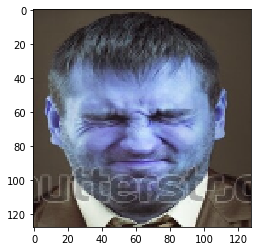

In [4]:
img=cv2.imread("E:/eye_blink_detection/blink_image/blink_3.jpg")
#img=cv2.imread("D:/img-3.jpg")

#img=cv2.imread("E:/eye_blink_detection/eyelids_open_image/nn.jpg")
print(img.shape)
img=cv2.resize(img,(128,128))
plt.imshow(img)
#print(img.shape)
img1=img.copy()
#img=img/255
img=[img]
img = np.concatenate([arr[np.newaxis] for arr in img])
print(img.shape)
 
img=img.astype("int32")

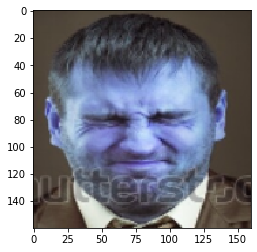

In [5]:
img_new=cv2.resize(img1,(160,160))
plt.imshow(img_new)

In [6]:
#input_shape = input_details[0]['shape']
    #input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
tensor_index = interpreter.get_input_details()[0]['index']
input_tensor_z= tf.convert_to_tensor(img, np.float32)
interpreter.set_tensor(tensor_index, input_tensor_z)


interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[[-7.72107925e+01  9.18973618e+01  1.57204910e+02 ... -8.93926010e+01
    4.20812721e+01  4.20763794e+02]
  [-8.17064972e+01  8.05185623e+01  5.54684639e+01 ... -1.50410629e+02
    8.55769873e-01  4.76214447e+02]
  [ 1.14099113e+02  1.25604729e+02 -1.98389755e+02 ... -1.94427490e+02
    6.09184494e+01  7.49950623e+02]
  ...
  [ 1.87431172e+04 -6.89184277e+03  1.26564055e+05 ... -4.12786562e+04
    7.66156719e+04 -3.37957656e+04]
  [ 5.81941699e+03 -1.01016650e+03  1.54997625e+05 ... -4.54337969e+04
    6.65400938e+04 -3.81588906e+04]
  [ 1.65638633e+04  2.81906494e+03  2.13746172e+05 ... -6.11497344e+04
    8.49277656e+04 -4.03060000e+04]]]


In [7]:
len(output_data[0][0])

16

0 1


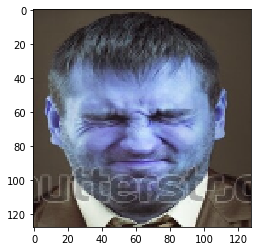

In [8]:
index=0
x_index = (index)*2
y_index = (index)*2+1
print(x_index,y_index)
x = int(output_data[0][0][x_index]*img1.shape[1])
#print(x)
y = int(output_data[0][0][y_index]*img1.shape[0])
#print(x,y)
color = (255,0, 0)
img1_annoted = cv2.circle(img1.copy(),(x,y), 1, color, 1)
plt.imshow(img1_annoted)

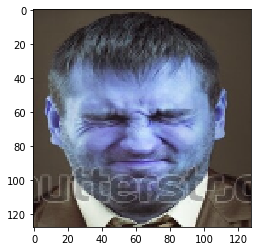

In [9]:
img1_annoted = img1.copy()
for index in range(8):
    x_index = (index)*2
    y_index = ((index)*2)+1
    #print(x_index,y_index)
    x = int(output_data[0][0][x_index]*img1.shape[1])
    y = int(output_data[0][0][y_index]*img1.shape[0])
    color = (255,0, 0)
    #print(x,y)
    img1_annoted = cv2.circle(img1_annoted,(x,y), 3, color, 3)
plt.imshow(img1_annoted)